# Introduction to Python

Welcome to this introduction to Python! Over the course of this notebook, you'll learn how to use Python to deal with data. Specifically, you'll learn how to import, preprocess, visualise, and statistically analyse data from typical psychological experimental or survey studies.

### What's this?

The document before you is a Jupyter Notebook, and it contains embedded Python snippets. Python is a programming language, and Jupyter notebooks are a way to share and explain short bits of code. The neat thing about this notebook is that it can be run online, for example via [Binder](https://mybinder.org/). This means you don't have to have Python installed on your computer to follow along.

If you do have Python installed, that's great! You can copy the code from this worksheet into a Python script, and from there run it locally. Make sure you have all the required packages installed: NumPy, SciPy, Matplotlib, and scikit learn.

### Further reading

If you are interested in learning Python, there are many online resources. A quick Google with "Python" and your topic/field of choice should help you along. In addition, the experimental psychologists among us could turn to the book [*Python for Experimental Psychologists*](https://www.routledge.com/Python-for-Experimental-Psychologists-1st-Edition/Dalmaijer/p/book/9781138671577) by Dr Edwin Dalmaijer, published by Routledge. **2020 deprecation note: This book teaches you about Python 2, which is no longer supported. It might be wise to wait for the next edition, or to find a free online resource.**

## Getting started...

In Python, you usually start by importing *modules*. Each module offers different functionality, and they are not automatically loaded. (There are so many modules that auto-loading all of them would be a huge waste of time and resources, and also risk conflicts between similar names!)

In [2]:
# We'll import NumPy for it's numerical capabilities.
import numpy
# We'll need Matplotlib's sub-module pyplot to create figures.
from matplotlib import pyplot

## Creating some fake data

Normally, creating fake data is considered to be Very Naughty by the scientific community. However, it can be super helpful if you just want to test a few bits of code!

In [21]:
# Create 1000 x values (sampled from a uniform distribution).
# These values will be between 0 and 1.
x = numpy.random.rand(1000)
# Create 1000 y values (sampled from a normal distribution).
# These values should have a mean of 0, and a standard
# deviation of 1. We then add 0.1 to them, so that the mean
# will likely be a positive value.
y = numpy.random.randn(1000) + 0.1

Now plot the fake data to see what it looks like:

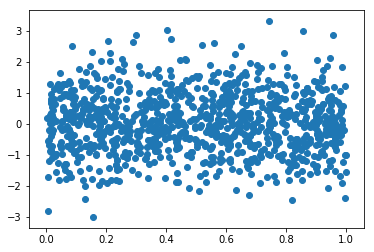

In [25]:
# Create a scatterplot of the x and y values.
pyplot.scatter(x, y)

Just by eye-balling the plot, you can see that there isn't really a relation between `x` and `y`. You can also see that the `x` values are quite uniformly spread between 0 and 1, while the `y` values are concentrated primarily around 0 with a reducing density towards higher and lower values.

This is as expected (because you randomly generated the data to be like this), but let's inspect the data a bit further so that you can be sure that it meets your expectations. One way to do this, is by creating a *histogram*. A histogram counts the number of occurences of values within particular bounds. For example, if you were to set up 10 equally sized *bins* (ranges of values restricted by a left and a right bound) to cover the range 0-1, each bin would be 0.1 wide.

Let's see how this works in practice:

In [26]:
# Create a histogram of the data by using NumPy's "histogram" function.
# Note that this does not produce a plot just yet! You can set the number
# of bins that you would like to divide the data over, and the function
# will then use that to create the bounds for each bin. The function will
# also return the number of observations in each bin.
hist, bin_bounds = numpy.histogram(x, bins=10)

We just allowed NumPy to choose the bin edges, which should generate bins with equal widths. You also have the option to choose the bin edges yourself by passing a list of boundaries.

Let's see what the bins look like by plotting them in a bar plot. Mind you that the bar plot only needs the left bound of every bin, whereas the variable `bin_bounds` refers to the left bound of every bin AND the right bound of the last bin. You can select all the left bounds but the last one by *indexing* or *slicing* the `bin_bounds` variable like this: `bin_bounds[0:-1]`. It means "*From bin_bounds, select all values from position 0 to position -1 (the last position from the end), not inclusive of the end point.*"

As you can see, slicing works with positive numbers that start at 0 (first position) and end at n-1 (where n is the number of elements in a list or array). You can also count backwards using negative number starting at -1 (last position), and ending at -n (first position).

Text(0,0.5,u'Number of observations')

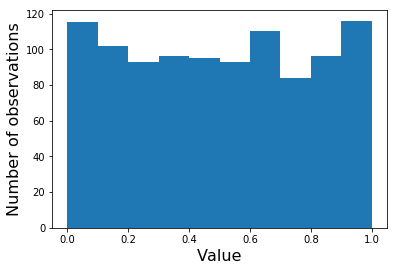

In [27]:
# Plot the bins using pyplot's bar function. We align the plot at the
# left edges, because those are what we obtained from the histogram
# function. The bin width can be set to 0.1 so that the bins touch.
pyplot.bar(bin_bounds[0:-1], hist, align="edge", width=0.1)
# Finish the plot by adding some information on the x and y axes.
pyplot.xlabel("Value", fontsize=16)
pyplot.ylabel("Number of observations", fontsize=16)

It's clear that the `x` values are spread quite uniformaly across the range 0-1. This is good, as it validates our random sampling procedure.

Let's do the same thing for the `y` values... This time, we're going to compute the centre of each bin from the bin edges. We'll do so by taking the difference between all edges using NumPy's `diff` function. This returns the difference between each consecutive value in an array. Then, we'll add half the difference to the left bound of every bin. The logic here is that the difference is the distance between each bin's left and right bound, so half the difference should be the distance between each bin's left edge and the bin's centre. Adding this to each bin's left edge should give you the centre.

We'll also compute the mean width of each bin, so we can use that to determine the width of the bars in the plot.

Text(0,0.5,u'Number of observations')

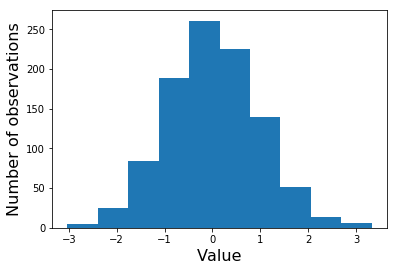

In [28]:
# Create a histogram of the y values.
hist, bin_bounds = numpy.histogram(y, bins=10)
# Compute the centres of each bin.
bin_centres = bin_bounds[:-1] + numpy.diff(bin_bounds)/2.0
# Compute how wide the average bin is.
bin_width = numpy.mean(numpy.diff(bin_bounds))
# Plot the bins using pyplot's bar function. We align the plot at the
# left edges, because those are what we obtained from the histogram
# function. The bin width can be set to 0.1 so that the bins touch.
pyplot.bar(bin_centres, hist, align="center", width=bin_width)
# Finish the plot by adding some information on the x and y axes.
pyplot.xlabel("Value", fontsize=16)
pyplot.ylabel("Number of observations", fontsize=16)

Two things immediately stand out: The first point the note is that the `y` values are spread out across a wider range than the `x` values. (This is also why the bars appear thinner.) In addition, the `y` values are more likely to occur around 0. This is because we drew the `y` values from a normal distribution.

# Plotting groups

From this point on, we'll treat the `x` and `y` groups as two different groups. Your objective is to find a way to visualise them in the clearest way possible. Keep in mind that other people are generally interested in knowing two things: 1) What are the characteristics of each group?, and 2) How are the two groups different?

## Bar plot

There's a very high likelihood that you've seen a bar plot before. They're everywhere, from scientific journals to newspapers. Traditionally, bar plots show the mean of each group. In our case, that would look like this:

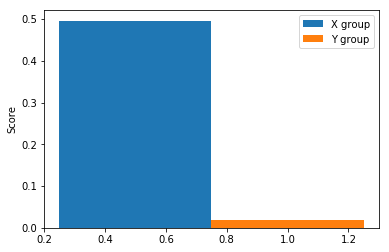

In [29]:
# Compute the mean of the groups.
m_x = numpy.mean(x)
m_y = numpy.mean(y)
# Plot both means in a bar plot. The means will determine the groups
# position on the y-axis, but the position on the x-axis is something
# we need to set ourselves. Let's just go with 0.5 and 1.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

From the current bar plot, it looks like the `x` group is doing very well compared to the `y` group (assuming positive values are better).

In reality, there are values in the `y` group that extend beyond the range of the `x` group. Furthermore, the two groups were drawn from different types of distributions. We don't see that in this plot.

## Error bars

One way to improve bar plots is by adding *error bars*. These bars sit atop the bars, and usually indicate the standard error of the mean. If you're unfamiliar with this metric: It's essentially a quantification of how well the sample reflects the population, i.e. how representative the mean in our sample from the `x` population is for the mean in the whole population.

We can compute the standard error by dividing the sample standard deviation by the square root of the number of observations in that sample.

In [30]:
# Count the number of observations in each group by taking the length
# of the x vector.
n_x = len(x)
n_y = len(y)
# Calculate the standard deviations of each group. Note that we are 
# calculating the unbiased standard deviation, i.e. the sum of squares
# divided by (n-1). This is what the ddof value indicates.
sd_x = numpy.std(x, ddof=1)
sd_y = numpy.std(y, ddof=1)
# Calculate the standard error of the mean for both groups.
sem_x = sd_x / numpy.sqrt(n_x)
sem_y = sd_y / numpy.sqrt(n_y)

Now let's use the calculated standard errors to draw error bars into your bar plot. This is almost the same code as before, but mind the `yerr` keyword argument that specifies the error bar size on the y-axis.

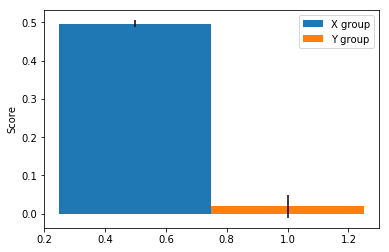

In [31]:
# Plot both means in a bar plot. This is the same code as before, but 
# with the yerr keyword specified.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, yerr=sem_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, yerr=sem_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

The standard error of the mean indicates how well the sample mean represents the population mean. It's a measure that reflects something about your sampling process, not necessarily about what your data looks like. The plot above thus shows that the two groups might well differ in what their means are, but it doesn't tell you much else.

One thing you can do, is use error bars to plot the standard deviation:

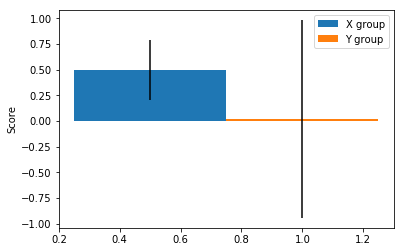

In [32]:
# Plot both means in a bar plot. This is the same code as before, 
# but now the yerr represents the standard deviation.
# Plot the mean of the x group.
pyplot.bar(0.5, m_x, yerr=sd_x, width=0.5, label="X group")
# Plot the mean of the y group.
pyplot.bar(1.0, m_y, yerr=sd_y, width=0.5, label="Y group")

# Now finish the plot by adding a sensible y-axis label and a legend.
pyplot.ylabel("Score")
pyplot.legend()

In this plot, it's a bit clearer what the distributions of both groups look like. But it's not pretty... It's quite unclear why the bars are there in the first place, as the only thing they indicate is how far from 0 a group's mean is. In addition, although the standard deviation gives some indication of the spread of each group, we don't quite see what the exact distributions look like: it's just a black line.

## Are bar plots really that bad?

If you haven't seen a lot of datasets, you might not appreciate how summary statistics (mean, median, standard deviation, etcetera) can be misleading. To illustrate just how different datasets can be while having the exact same mean, median, standard deviation, and correlation, please have a look at Alberto Cairo's datasaurus, and a [dozen extremely different plots](https://www.autodeskresearch.com/publications/samestats) that all have the exact same summary statistics:

![](datasaurus_alberto_cairo.png)

This is why it's important to be aware of the underlying distribution of data, and to not simply rely on summary statistics. Bar plots only show summary statistics, and can thus hide potentially important differences between groups.

## Box plot

One type of plot that *does* reflect properties of distributions is the box plot, also known as "box-and-whiskers plot". It quite literally is two stacked boxes with whiskers on either side. Each element of the plot represents a quartile (25% of the observations) of the data. This type of plot tells you about each group's median (the 50th percentile lies between the second and third quartile), and gives you a rough idea of what the distribution looks like. Some boxplots also include 'fliers': Values that lie outside the typical range, and could be outliers.

Let's draw box plots for our two groups:

{'boxes': [<matplotlib.lines.Line2D at 0x7f58b7f0aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f58b7f18450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f58b7f22090>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f58b7f18c50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58b7f0ab50>,
  <matplotlib.lines.Line2D at 0x7f58b7f22c90>]}

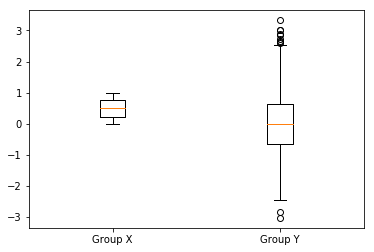

In [34]:
# Draw a box for values from group x and group y. You can pass both 
# variables at the same time by combining them into a list, i.e. as
# [x,y]. The same is true for the labels you would like to associate
# with the groups.
pyplot.boxplot([x,y], labels=["Group X","Group Y"])

This is a pretty good visualisation of the two groups. We can see their central tendency, because the median is represented by the coloured horizontal line. In addition, we can see how observations are spread out. For group `x`, all quartiles are roughly equally big, which demonstrates that the data is uniformly distributed. For group `y`, we can see that the second and third quartile (the boxes) are smaller than the first and fourth quartile (the whiskers). This illustrates that the distribution is denser around the median.

What we still can't see from the current plot is what the shape of the distribution is. For example, it seems like group `y` is a normal distribution, but it could also be that all values within the second and third quartile are the same. For example, they could all be -0.5 and 0.5, and it would result in the same box plot.

## Violin plot

Where box plots do not typically reveal the exact shape of a distribution, violin plots are designed to do exactly that. They apply a *kernel density estimate* to characterise the shape of a distribution, and plot that instead of boxes and whiskers. Fliers are still denoted with a different marker (although what is considered a "flier" can differ between box plots and violin plots, or more accurately, per what standards are set within the function to draw the plots).

Let's see what a violin plot of our two groups would look like:

{u'bodies': [<matplotlib.collections.PolyCollection at 0x7f58b7e9e2d0>,
 u'cbars': <matplotlib.collections.LineCollection at 0x7f58b7e2c210>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x7f58b7e9eb50>,
 u'cmeans': <matplotlib.collections.LineCollection at 0x7f58b7e9e1d0>,
 u'cmins': <matplotlib.collections.LineCollection at 0x7f58b7e9ee90>}

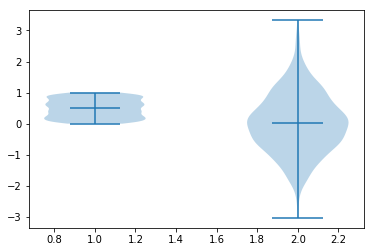

In [35]:
# Draw a violin plot for values from group x and group y. As 
# with the box plot, you can pass both variables at the same
# time by combining them into a list, i.e. as [x,y].
pyplot.violinplot([x,y], showmeans=True)

The violin plot gives a much clearer picture of the actual distribution of your data.

# Choosing a visualisation type

As you have seen, different types of data visualisations exist, and each come with their own benefits and downsides. Bar plots can be easily understood, but also give you very little information about what underlying data look like. In addition, whether or not it makes sense to draw a bar highly depends on what kind of data you're visualising. Adding error bars to bar plots to indicate the standard error of the mean tells you something about the sampling process, whereas adding error bars to indicate the standard deviation tells you something about the sample.

If you're interested in visualising distributions in a more detailed way, you could turn to box or violin plots. These provide a clearer picture of what your data look like, and are still quite easy to interpret.

What the best type of plot is depends on the data, and on what message you would like your graph to illustrate. If you're simply saying "these groups have different means", a bar plot with error bars that indicate the standard error of the mean could work very well. However, if you're trying to illustrate that two groups are from distributions with different properties, you might need to turn to box or violin plots.

Finally, you can combine plots and types of visualisations. For example, you could simply throw everything into one combined plot:

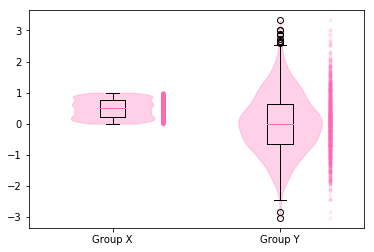

In [36]:
# Determine the positions of the two groups' visualisations
# on the x-axis.
pos = [0.5, 1.5]

# Draw violin plots for each group, but don't draw the mean,
# median, or extrema.
vplot = pyplot.violinplot([x,y], positions=pos, \
    showmeans=False, showmedians=False, showextrema=False)
# Set the colour of the violin plot.
for violin in vplot["bodies"]:
    violin.set_color("#FF69B4")
# Draw box plots for each groups on the same positions.
bplot = pyplot.boxplot([x,y], positions=pos, \
    labels=["Group X", "Group Y"])
# Set the colour of horizontal lines that indicate the median
# in each box plot.
for line in bplot["medians"]:
    line.set_color("#FF69B4")

# Finally, draw the individual data points for each group. The
# points need to be plotted to the right of each of the 
# box/violin plots. To do so, we first need to create two 
# vectors that code for the position of each sample from each 
# group on the x-axis.
x_pos = numpy.ones(x.shape) * pos[0] + 0.3
y_pos = numpy.ones(y.shape) * pos[1] + 0.3
# Then, we simply need to plot the samples. The alpha keyword
# indicates the transparancy of each sample.
pyplot.plot(x_pos, x, '.', color="#FF69B4", alpha=0.1)
pyplot.plot(y_pos, y, '.', color="#FF69B4", alpha=0.1)

# T-test Fest

In this next bit, we will be thinking about surprising events and group differences. For example, if you read "men are taller than women", what does that mean? Are all men taller than all women? Are most men taller than most women? Or maybe men are taller than women *on average*? But what is a meaningful difference? Would it be meaningful if men, on average, are 1 cm taller than women? Where do you draw the line? Also, how many men and women would you need to test before you believe they might have different average heights?

How we think about these questions has shaped our usage of statistics, and you could even argue that how we use statistics has shaped how we think about differences between groups. (That sounds a bit esoteric now, but will become clearer towards the end of this section.)

## Do you need to measure the entire population?

Let's start with an example. When I'm in a debate with someone, but find that I struggle to come up with a sensible argument, I like to hold my breath in anger. My opponent is now left with only two options: Concede the point, or engage in an impromptu breath-holding competition. Obviously, this strategy only works if there is a high likelihood that I can hold my breath longer than my opponent. How could we come to know this likelihood?

First, we need to know how long I can hold my breath. This is easy: I just hold my breath for as long as I can, and record how long it was using a stopwatch. Let's say this was 83 seconds.

Next, we need to compare my breath-holding ability with the people I usually debate. In order to do this, we need to establish who this population is. As I work and live in Cambridge, the people I debate are likely those who live here, and specifically those found in and around the University. This is a problem: It's cumbersome and potentially expensive to test *everyone* who is associated with the University of Cambridge.

Instead of the whole target population, maybe we could take a random selection of people from them? If those people are representative, we could use them to infer what the population must look like. This is called a *sample".

In this case, I measured a convenience sample of my Cambridge undergraduate students by by instructing them to hold their breath as long as they could, and write down their time.

*Of course, this is not ideal: Undergraduate students are around the same age, and were made to do this as a stupid exercise in what should have been a serious stats class. So perhaps the sample is biased, and the measurement sub-optimal. Let's forget about those very reasonable objections for now, and simply assume the sample is representative of the wider Cambridge population. Or that I only ever debate undergrads, as I'm not brave enough to take on anyone with higher educational credentials than that.*

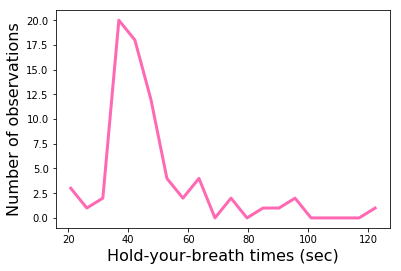

In [20]:
import numpy
from matplotlib import pyplot

# These times were measured during three stats classes.
times_a = [45.53, 41.30, 36.21, 49.3, 41.0, 63, 38.15, \
    35.1, 38.1, 47.9, 46.6, 23.0, 60.0, 42.0, 35.7, 41.2]
times_b = [42.0, 38.0, 46.0, 88.1, 125, 41.3, 36.0, \
    40.0, 43.7, 34.7, 38.4, 42.0, 61.0, 36.0, 43.4, \
    36.14, 18.23, 49.0, 38.0, 22.47, 35.51, 63.15, \
    35.2, 51.53, 34.13, 54.0, 43.2]
times_c = [94.0, 83.0, 95.0, 36.5, 49.0, 44.0, 43.0, \
    57.0, 35.8, 44.0, 44.4, 49.0, 39.0, 42.0, 35.0, \
    50.0, 53.0, 52.0, 33.0, 37.0, 48.0, 74.0, 41.0, \
    49.0, 38.0, 25.0, 61.0, 47.0, 41.0, 73.0]

# Let's add all the times together.
times = []
times.extend(times_a)
times.extend(times_b)
times.extend(times_c)
t = numpy.array(times, dtype=float)

# Make a histogram to count how frequently each breath-
# holding time occurs in the sample.
hist, edges = numpy.histogram(t, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.show()


Great, now we know what the population should roughly look like. From the histogram, we can read that the most likely breath-holding times are around 40 seconds. We can also see that the times are quite variable: They range all the way from 20 to 120 seconds! Even if we look at just the times with the most observations, there's a substantial range from about 30-50 seconds.

## When is a value noticably different?

So what about my 83 seconds? Is it a surprising value within this population? More importantly, does it make me likely to win debate-avoiding breath-holding competitions? One way to compute this, is by calculating how many people can hold their breath for less long than me. This proportion would reflect the probability of encountering someone who can hold their breath for less long, and thus of my winning.

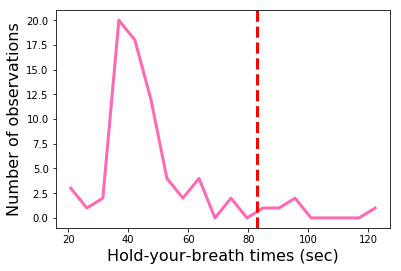

68/73 observations (prop=0.93) lower than 83.0 seconds


In [2]:
# Define my value.
v = 83.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)

# Plot my value in there.
pyplot.axvline(v, linestyle="--", lw=3, color="#FF0000")
pyplot.show()

# Compute how many values were lower.
lower = t < v
n_lower = numpy.sum(lower.astype(int))
p_lower = float(n_lower) / len(t)

print("{}/{} observations (prop={}) lower than {} seconds".format( \
    n_lower, len(t), round(p_lower, ndigits=2), round(v, ndigits=1)))

As you can see, about 93% of our sample falls below my time. This means that I would lose my argument only in 7% of cases.

Another way of thinking about this is to ask whether my time is surprising given the population. You could argue that my breath-holding ability is somewhat rare, with only 7% of people doing better. You could also argue that it's within the normal population, and that there are quite a lot of people who can hold their breath for much longer. Where you draw this line of what is surprising is arbitrary, and depends on context.

What you just calculated is akin to a *p value*. Our measured data forms a *probability distribution* that tells you just how likely each breath-holding time is. When a time is associated with value of p=0.07, it tells you that 93% of a population is expected to score lower.

If you would like to play around with distributions and p values some more, this Shiny app is great: https://gallery.shinyapps.io/dist_calc/

## When is a whole group of values noticably different from what I expected?

Imagine that you are an alien, unfamiliar with the human race. You came upon Earth, found a funny-looking mammal, and decided to bring it back to your ship. Unfortunately, you notice too late that humans don't thrive in your water tank, but in fact drown. You grab another one, and observe that they fare better in an environment closer to the earths atmosphere. It turns out they have this weird thing where they suck in air, and then breathe it out again. You assume that this is why they didn't do well in your water tank.

You now wonder whether humans have to continuously do this breathing thing, or whether they might have some internal reserves. From your initial water tank mishap, you assume that humans simply cannot do without continuosly inhaling and exhaling air. Hence, your hypothesis is that humans cannot hold their breath. Well, maybe for like 30 seconds, because that's how long your first human visibly struggled in the water tank.

You decide to run a study$^*$: You extract a number of Cambridge undergraduates, ask your subjects to stop exhaling new air, and measure how long it takes before they have to inhale again. Of course, you end up with the same data as we've just seen.

*\* You don't have to get IRB approval, because it is known that humans are primitive life that probably isn't even conscious. Many even wonder whether they feel pain at all, and even if they do, they probably wouldn't experience it in the same way as you, or even be able to conciously remember it.*

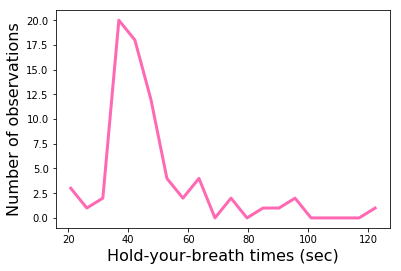

In [3]:
import numpy
from matplotlib import pyplot

# These times were measured during three stats classes.
times_a = [45.53, 41.30, 36.21, 49.3, 41.0, 63, 38.15, \
    35.1, 38.1, 47.9, 46.6, 23.0, 60.0, 42.0, 35.7, 41.2]
times_b = [42.0, 38.0, 46.0, 88.1, 125, 41.3, 36.0, \
    40.0, 43.7, 34.7, 38.4, 42.0, 61.0, 36.0, 43.4, \
    36.14, 18.23, 49.0, 38.0, 22.47, 35.51, 63.15, \
    35.2, 51.53, 34.13, 54.0, 43.2]
times_c = [94.0, 83.0, 95.0, 36.5, 49.0, 44.0, 43.0, \
    57.0, 35.8, 44.0, 44.4, 49.0, 39.0, 42.0, 35.0, \
    50.0, 53.0, 52.0, 33.0, 37.0, 48.0, 74.0, 41.0, \
    49.0, 38.0, 25.0, 61.0, 47.0, 41.0, 73.0]

# Let's add all the times together.
times = []
times.extend(times_a)
times.extend(times_b)
times.extend(times_c)
t = numpy.array(times, dtype=float)

# Make a histogram to count how frequently each breath-
# holding time occurs in the sample.
hist, edges = numpy.histogram(t, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.show()


Your next question is simple: Is this what you expected? Do the results confirm your hypothesis that humans cannot hold their breath?

Your expectation was that humans could not hold their breath, or more specifically that they wouldn't be able to for more than about 30 seconds. The difficulty is in translating your expectation to the language of numbers and distributions.

Essentially, what you're saying is that you expect the average human being to be able to hold their breath for a maximum of 30 seconds. That doesn't have to mean that all humans abide by that: some will be worse, and some beter. In terms of a distribution, you're expecting that the central tendency of the distribution is around 30 seconds.

Let's plot your expected average in the histogram, and see if it aligns with the real average.

Expected mean: 30.0, real mean: 47.03


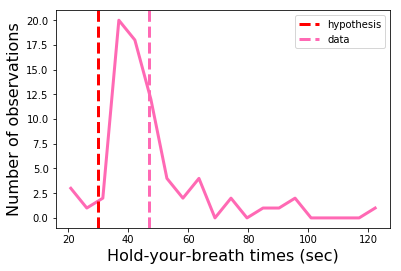

In [4]:
# Define expected average value.
m_expected = 30

# Compute the real average.
m_real = numpy.mean(t)
print("Expected mean: {}, real mean: {}".format( \
    round(m_expected, ndigits=2), round(m_real, ndigits=2)))

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)

# Plot the expected and real averages in there.
pyplot.axvline(m_expected, linestyle="--", lw=3, color="#FF0000", \
    label="hypothesis")
pyplot.axvline(m_real, linestyle="--", lw=3, color="#FF69B4", \
    label="data")
pyplot.legend(loc="upper right")
pyplot.show()


There are a few things of interest in this plot. For starters, your average (hot pink dashed line) doesn't seem to align perfectly with where the distribution is thickest. This is because the distribution is right-skewed, and thus the average might not be the ideal metric for the distributions central tendency. (Using the median would probably be better, but for now we'll just ignore that our data isn't normally distributed.)

The next interesting thing is that while a bit of the distribution is below your expected average, the real average is different from what you expected. How can you tell whether this difference is meaningul? This is where statistics come to the rescue.

If your expectation of a 30 second average breath-holding time was accurate, you would expect to find that samples that you measure would vary around 30 seconds. Sure, some samples would be slightly higher, and some lower, but over the whole they should sit around 30 seconds. Hence, if you were to run a lot of experiments, the averages that you find in each of them would form a distribution around 30 seconds. This distribution is called a *null distribution*.

The above means that there should be a relatively low chance that you find an average value that is a lot higher than 30 seconds. Therefore, finding such a value would be quite surprising. In fact, finding a few surprising results might even persuade you to abandon your initial hypothesis of a 30 second average, and instead lead you to believe that the average is higher. This is the core principle in *null-hypothesis significance testing*.

There is still one important question we haven't answered: When is a value considered "higher"? Specifically, you measured an average of about 47 seconds. This is obviously higher than the expected 30 seconds, but how can you tell whether it is meaningfully higher?

#### Variance

This is where the concept of *variance* comes in. Variance is how much measurements in a sample deviate from its mean. To compute it, you simply take the difference between each measurement and the mean. Unfortunately, when you average those differences, you should end up at 0, because there will be as many positive as there are negative differences (assuming the data is normally distributed). To deal with this, you could simply square all differences between each measurement and the mean. In that way, all differences are positive, so you can safely average them. (Of course, squaring all values will make them all super big, so afterwards you could take the square root of the average of squared differences, so that you end up with a reasonable value again.) The higher this value, the higher variance.

This idea is captured in the *standard deviation*, which is essentially the average unsigned difference between all measurments and their average. It's computed like this:

$s(x) = \sqrt{{{ \Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2} } \over {n}}}$

In this equation, $x$ is all our measurements, $n$ is our sample size, and $\bar{x}$ is the average of our measurement.

The neat thing about variance is that it gives us an idea of the context of an observed difference. Take, for example, a breath-holding time of 67 seconds (20 seconds above the average): If measurements on average deviated 100 seconds from the average, then 20 seconds doesn't sound like a very big value. (It's only 0.2 standard deviations.) However, if they only deviated by 2 seconds, 20 seconds seems like a pretty unexpected value! (That would be 10 standard deviations!)

#### Standard error

The average and standard deviation are *population characteristics*. They reflect the central tendency and spread of values in a population. Imagine the breath-holding abilities of all people on earth. The more people you test, the closer your estimation of the average and standard deviation is going to be to the real population, up until the point that you've tested every single member of the population.

Imagine that you, the alien who's super interested in how long humans can hold their breath, do a whole bunch of studies. In each, you take a sample of humans, and measure the samples average breath-holding ability. You won't get the same mean every time, but because the humans all come from the same population of "humans on earth", it's more likely that you will find means closer to the population mean. In other words, the means that you measure in each of your studies will form their own distribution.

Let's illustrate this point in your own sample:

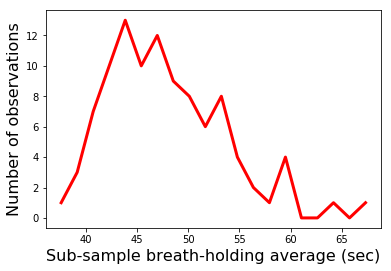

In [5]:
# Seed the random number generator (this makes
# sure that we get the same result when re-running
# this code, which is not necessary, but good
# for in-class demo purposes.)
numpy.random.seed(3)

# Define the number of sub-samples.
n_samples = 100

# Count the number of observations you had in
# your original measurement.
n = len(t)

# Keep a record of the means that you find for
# each sub-sample.
m = numpy.zeros(n_samples, dtype=float)
# Run through all "studies"
for i in range(n_samples):
    # Choose a random sub-sample of 10 people
    # from the measured times.
    sub_sample = numpy.random.choice(n, 10)
    # Compute the average of this sub-sample.
    m[i] = numpy.mean(t[sub_sample])

# Make a histogram to count how frequently each breath-
# holding average time occured in the sub-samples.
hist, edges = numpy.histogram(m, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF0000")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Sub-sample breath-holding average (sec)", fontsize=16)
pyplot.show()


The above illustrates how the sample means would be distributed if you had taken samples of 10 people from your "population" of your actual sample of 73 undergraduate students. As you can see, the sub-sample averages are centred around the population mean of 47 seconds.

You can use your new knowledge of this sample mean distribution to compute your expected measurement error. This is known as the *standard error of the mean*, and gives you an idea of how well your sample reflects the true population mean. You compute it by dividing the standard deviation (computed above) by the square root of the number of observations.

$s(\bar{x}) = {{s} \over {\sqrt{n}}}$

This equation tells you that the more people are in your sample, i.e. the higher $n$ is, the lower your standard error is going to be.

#### One-sample t-test

For this next trick, you will use variance to quantify how much you believe in your observed difference. Specifically, you're going to take the breath-holding difference (between your expected value and the observed average), and you'll divide that by the standard error of the mean.

This is a sensible thing to do: You observed a particular difference (signal), and now you're putting that difference into the perspective of expected measurement error (noise). In a way, you're just trying to figure out whether your observed difference is a product of the noise in your measurement, or whether it might actually be because your hypothesis was wrong.

$t = {{\bar{x} - \mu_{0}} \over {s_{\bar{x}}}}$

The numerator here is your observed average (47 seconds) minus your expected average (30 seconds). In other words, this is the difference between your measurement and your null hypothesis. If your null hypothesis is true, you would expect this value to be 0.

The denominator is your "noise". The higher the standard error of the mean, the lower your confidence in your measured average is, and hence the lower your confidence in its difference from the null hypothesis. More noise directly translates into a lower $t$ value.

So let's see all of this in practice:

In [6]:
# Define your expected average.
m_null = 30.0

# Count the number of observations.
n = len(t)

# Compute the average.
m = numpy.mean(t)

# Compute the standard deviation.
sd = numpy.sqrt(numpy.sum((t - m)**2) / (n))

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n-1)

# Now compute the t-value.
t_val = (m - m_null) / sem

print("m={}, sd={}, sem={}, t={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2)))

m=47.03, sd=17.28, sem=2.04, t=8.36


Great! The $t$-value is over 8!

But... Is that a lot?

Remember, we expect a $t$ value of 0 if the null hypothesis is true. We also expect a low $t$ value if the measurement noise is high. In order to know whether this $t$ is surprising, we need to know what the $t$ distribution looks like. (You can also mess around with an interactive $t$ distribution here: https://rpsychologist.com/d3/tdist/ )

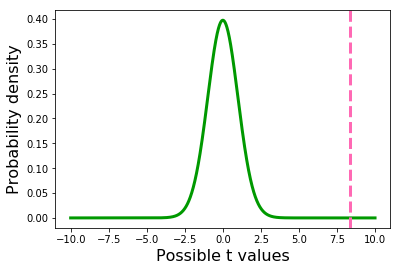

In [7]:
import scipy.stats

# Create x values.
x = numpy.arange(-10.0, 10.01, 0.01)
# Create t values, based on the degrees of freedom.
t_dist = scipy.stats.t.pdf(x, df=n-1)

# Plot the t distribution.
pyplot.plot(x, t_dist, '-', lw=3, color="#009900")
pyplot.xlabel("Possible t values", fontsize=16)
pyplot.ylabel("Probability density", fontsize=16)
# Plot our t value in the plot.
pyplot.axvline(t_val, linestyle="--", lw=3, color="#FF69B4")
pyplot.show()

So it looks like the $t$ value that you observed (pink dashed line) is not very likely at all given the distrubution of $t$ values! You can compute exactly how likely it is that a $t$ value is equal to or higher than yours:

In [8]:
p_val = 1.0 - scipy.stats.t.cdf(t_val, df=n-1)

print("One-sided p value = {}".format(p_val))

One-sided p value = 1.63169477929e-12


This is testing a *directional hypothesis*: Whether the observed $t$ value is higher than expected given the $t$ distribution. However, sometimes you might not have a directional hypothesis, but simply wonder whether an observed value is different from your expectation, whether that is higher or lower. You can then compute how likely it is to observe a $t$ value of higher or equal to the absolute $|t|$ value, or equal to or lower than $-|t|$.

In [9]:
p_val = 2.0 * (1.0 - scipy.stats.t.cdf(numpy.abs(t_val), df=n-1))

print("Two-sided p value = {}".format(p_val))

Two-sided p value = 3.26338955858e-12


You'll be delighted to know that we can simplify the above code by using existing functions:

In [10]:
from scipy.stats import ttest_1samp

# Define your expected average.
m_null = 30.0

# Count the number of observations.
n = len(t)

# Compute the average.
m = numpy.mean(t)

# Compute the standard deviation.
sd = numpy.std(t)

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n)

# Now compute the t-value.
t_val, p_val = ttest_1samp(t, m_null)

print("m={}, sd={}, sem={}, t={}, p={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2), \
    p_val))

m=47.03, sd=17.28, sem=2.02, t=8.36, p=3.2633551453e-12


#### What does this p value mean?

The $p$ value that you just computed is the probability of you finding an average breath-holding time that is equal or more extreme than 47 seconds, *if the null hypothesis is true*.

This is important, so I'm going to stress it: *If your expected average of 30 seconds is the real population average*, the estimated probability of you measuring a 47 second average in your sample of 73 people is $3.26e-12$.

This could mean two things:

1) This is a fluke, the true population average is 30 seconds, and you just happened to test a sample of people with a higher average. Random chance. It's unlikely, but it happens.

2) Maybe your expected average of 30 seconds isn't the true population mean.

How do you known which of these two options is correct? Simple: You don't! Not on the basis of a single study, anyways. You could do more studies, and compute $p$ values for all those studies too. If the null hypothesis ("humans can hold their breath for 30 seconds on average") is true, the $p$ values should be uniformly distributed between 0 and 1. If the null hypothesis is not true, you would expect $p$ values to be skewed towards 0.

For a cool demo on the $p$ value distribution, see here: https://rpsychologist.com/d3/pdist/

## Differences between two measurements within the same individuals

Before now, you had a very specific hypothesis based on some pilot data (N = 1 accidentally drowned human in a water tank after 30 seconds). Now that you've found a group of humans with a higher average breath-holding ability, you consider the possibility that maybe they got better at holding their over time.

Being able to train humans to hold their breath for long times would be great for you: It would mean you could stick them in water tanks to do all the necessary experiments, without risking they die before your experiments finish. You thus set up a new experiment: You'll take your existing sample of humans, and you make them hold their breath for as long as they can for five times a day. You also make them run around your space ship a lot$^*$.

*\*This is not because you think it will increase their lung capacity, but because they keep trying to escape their enclosure.*

### Loading data

You now have data on how long your sample could hold their breath at the time of first measurement, and also data from a measurement several weeks from the first. These times are stored in the file `breath_times.csv`.

The extension `.csv` stands for "comma-separated values", and they can be loaded into Python. NumPy's `loadtxt` function can read data directly from files that contain data that is separated (delimited) by commas, tabs, or other delimiters. To use this function, you need to specify the path to the file that you're trying to load. In addition, you can specify the delimiter (in this case `,`), the type of data (here it will be `float` for floating-point numbers), and whether or not the data should be transposed (via the `unpack` argument).

The function will return a NumPy array.

In [11]:
# Load the raw data.
raw_data = numpy.loadtxt("breath_times.csv", \
    delimiter=",", dtype=float, unpack=True)

# Convenience renaming.
x1 = raw_data[0,:]
x2 = raw_data[1,:]

Your question is simple: Is the average breathing time different at the second time? If so, humans might be made to improve, and that would be wonderful for your water tank experiments!

Let's start with the basics: Compute the difference between the first and second measurement:

In [12]:
# Compute the difference.
difference = x2 - x1

Positive values reflect a longer breath-holding time at the second measurement (potential improvement), whereas negative values reflect a longer breath-holding time at the first measurement (potential decline).

Let's compute the mean, standard deviation, and standard error of the mean for these differences.

In [13]:
# Count the number of observations.
n = len(difference)

# Compute the average.
m = numpy.mean(difference)

# Compute the standard deviation.
sd = numpy.sqrt(numpy.sum((difference - m)**2) / (n))

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n-1)

print("m={}, sd={}, sem={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2)))

m=7.58, sd=20.09, sem=2.37


In this case, your null hypothesis is that humans can't improve. Thus, your expected difference is 0 milliseconds.

Because you have this specific prediction, you can compute a $t$ value again!

In [14]:
# Define your expected average.
m_null = 0.0

# Now compute the t-value.
t_val = (m - m_null) / sem

print("m={}, sd={}, sem={}, t={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2)))

m=7.58, sd=20.09, sem=2.37, t=3.2


This also means you can see where the $t$ value lies on the expected probability distribution, and compute a $p$ value from that point on the distribution:

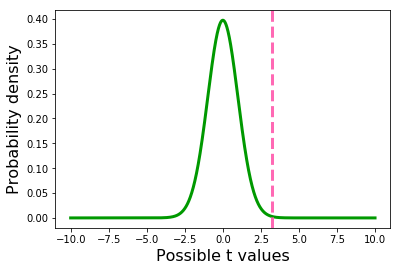

Two-sided p value = 0.00204220863149


In [15]:
# Create x values.
x = numpy.arange(-10.0, 10.01, 0.01)
# Create t values, based on the degrees of freedom.
t_dist = scipy.stats.t.pdf(x, df=n-1)

# Plot the t distribution.
pyplot.plot(x, t_dist, '-', lw=3, color="#009900")
pyplot.xlabel("Possible t values", fontsize=16)
pyplot.ylabel("Probability density", fontsize=16)
# Plot our t value in the plot.
pyplot.axvline(t_val, linestyle="--", lw=3, color="#FF69B4")
pyplot.show()

# Compute the p value.
p_val = 2.0 * (1.0 - scipy.stats.t.cdf(numpy.abs(t_val), df=n-1))

print("Two-sided p value = {}".format(p_val))

#### Related-samples t-test

What you've just done, is called a *related-samples t-test*. It's used to test for differences between two measurements *within participants*. The null hypothesis is that there is no difference between the two related measurements.

In [16]:
from scipy.stats import ttest_1samp, ttest_rel

# One-sample t-test of the difference between two related measurements.
t_val, p_val = ttest_1samp(x2-x1, 0)
print("One-sample t-test:      t={}, p={}".format( \
    round(t_val, ndigits=2), p_val))

# Related-samples t-test of the difference between two related measurements.
t_val, p_val = ttest_rel(x2, x1)
print("Related-samples t-test: t={}, p={}".format( \
    round(t_val, ndigits=2), p_val))

One-sample t-test:      t=3.2, p=0.00204220863149
Related-samples t-test: t=3.2, p=0.00204220863149


## Differences in a measurement in two different groups

You, at this point more-or-less accidentally the galaxy's foremost expert on human breathing, decide that it's too much of a hassle to train humans to hold their breath for longer. Instead, you decide to investigate whether certain subsets of humans might have longer breath-holding times. These would be ideal water-tank inhabitants!

You decide to compare your existing sample with an entirely different group of humans who you think might be better at holding their breath. You reason that this second group of humans spends a lot more time in the water, so they must be better at holding their breath. In fact, they seem to have some adaptations that other humans lack, including a dorsal fin and a single hindleg that seems to propel them in the water.

Have a look at the data:

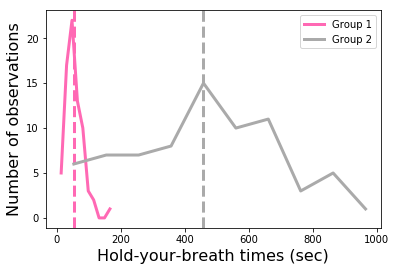

In [17]:
import numpy
from matplotlib import pyplot

# Load the raw data.
raw_data = numpy.loadtxt("breath_times_between-subjects.csv", \
    delimiter=",", dtype=float, unpack=True)

# Convenience renaming.
group_1 = raw_data[0,:]
group_2 = raw_data[1,:]

# Set some colours for the groups.
colours = ["#FF69B4", "#AAAAAA"]

# Loop through the groups.
for i, group_n in enumerate([group_1, group_2]):

    # Compute the real average.
    m_real = numpy.mean(group_n)

    # Make a histogram to count how frequently each breath-
    # holding time occurs in the sample.
    hist, edges = numpy.histogram(group_n, bins=10)
    bin_centres = edges[:-1] + numpy.diff(edges)/2.0

    # Plot the histogram.
    pyplot.plot(bin_centres, hist, '-', lw=3, color=colours[i], \
        label="Group {}".format(i+1))

    # Plot the expected and real averages in there.
    pyplot.axvline(m_real, linestyle="--", lw=3, color=colours[i])

# Finish the plot.
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.legend(loc="upper right")
pyplot.show()


It's pretty clear that these two groups are very different. However, you'd still like to get some statistical validation. Unfortunately, you can't use a related-samples t-test, as that was for measurements within the same individuals. Here, there are two groups of different individuals, so you can't simply compute difference scores.

#### Independent samples t-test

In a paired-samples t-test, you computed the differences between pairs of data (measurements collected within an individual). You then computed the average and the variance of this difference, and used those in your assessment of whether the two groups of measurements were different. For two independent groups, the data is not paired in the same way. This makes it impossible to use the same approach.

You can still compute the average and variance in each group. This means you could still compute the numerator in a t-test as the difference between the group means:

${\bar{x_{1}} - \bar{x_{2}}}$

Previously, the denominator was the standard error of the mean: The standard divided by the square root of the number of samples. Here, however, we have *two* standard deviations; one for each group. We need to combine those into the *pooled standard deviation* before we can compute a $t$ value:

$s_{pooled} = \sqrt{ {s^{2}_{x_{1}} + s^{2}_{x_{2}}} \over {2} }$

And now you can compute a $t$ value!

$t = { {\bar{x_{1}} - \bar{x_{2}}} \over {s_{pooled} \sqrt{{2 \over n}}} }$

Or, in code:

In [18]:
from scipy.stats import ttest_ind

t, p = ttest_ind(group_2, group_1)

print("t = {}".format(t))

t = 14.5932310103


The equation for $t$ above is only applicable when two assumptions are met: The groups must be of equal size, and the groups must be of equal variance.

If the groups are not of equal size, the pooled standard deviation instead becomes a weighted average of the two independent standard deviations.

If the groups are of unequal variance, things get even more complicated. The denominator is caluclated differently, and the degrees of freedom (used to construct a $t$ distribution) are computed in a different way too.

The best thing to do here, is use *Welch's test*. This is a modified independent-samples t-test that can handle unequal group sizes and variances. In code:

In [19]:
t, p = ttest_ind(group_2, group_1, equal_var=False)

print("t = {}".format(t))

t = 14.5932310103


# Correlation

People who listen to Taylor Swift tend to be happier. Across the population, people who indicate they listen to Taylor Swift for longer, also rate themselves as being happier<sup>\*</sup>. In other words, happiness and Taylor Swift listening *covary*. This can be expressed as a correlation: a quantification of how much two variables relate to each other.

<small>\*</small><sub><sup>Note: Not actually based on peer-reviewed research.</sup><sub>

To illustrate the concept of correlation, let's turn to a dataset. We asked a bunch of Cambridge students<sup>\*</sup> how often they listen to Taylor Swift (minutes per day), and how happy they would rate themselves on a scale of 0-10. We also recorded what year they were in. We then divided the dataset into 6 groups: undergrad years 1-4, MPhil or equivalent, and PhD. We then sorted the data to match individuals across the 6 groups who reported the exact same listening time. Miraculously, the groups matched *perfectly*. The data are stored in the attached `happy_taytay.csv` file. In this file, each row represents individual participants with the exact same daily Swift listening time. Each column represents a variable: the first is daily Swift listening time, the second is the happiness rating of 1st Year undergrads, the third is the happiness rating of 2nd Year students, etc. until we reach the happiness rating of PhD students in the final column.

<small>\*</small><sub><sup>No, we didn't. We just made up some data.</sup><sub>

Let's load the dataset into Python first. We can do this via a helpful NumPy function called `loadtxt`. This function requires us to pass the path to the dataset (its name and location on your computer or wherefrom else you're loading it), and a few keyword arguments that determine how the data is loaded. The first of these is `dtype`, which specifies what type of data is in our file: floating point numbers, or floats. The second is `delimiter`, which specifies how values are separated from each other: by commas. The third is `skiprows`, which indicates how many rows should be skipped while loading the data: just one row, as this contains the header data (with variable names). Finally, there is `unpack`, which determines whether data is transposed or not: In our case it should be.

In [2]:
# Import the libraries that we'll use. These are again NumPy
# and Matplotlib.
import numpy
from matplotlib import pyplot

# Load the data from the attached data file.
data = numpy.loadtxt("happy_taytay.csv", dtype=float, \
    delimiter=",", skiprows=1, unpack=True)

print(data.shape)

(7, 1000)


Now that we have loaded the data, we can do some convenience renaming of variables. We will use `tay_minutes` for the number of minutes participants listen to Taylor Swift every day. We will use `happy_*` for the average happiness rating for each group, where the `*` indicates what group the happiness rating belongs to.

In [4]:
# Create variable names that are a bit easier to use.
# The amount of minutes each student has listened to Taylor 
# Swift is in the first row (at index 0!), and is spread
# across all columns ("all" is indicated by ":").
tay_minutes = data[0,:]
# The happiness data is in the second (at index 1!) until 
# the seventh (at index 6!) row.
happy_Y1 = data[1,:]
happy_Y2 = data[2,:]
happy_Y3 = data[3,:]
happy_Y4 = data[4,:]
happy_M = data[5,:]
happy_PhD = data[6,:]

To get a feel for what the data look like, let's plot all of the values in different sub-plots.

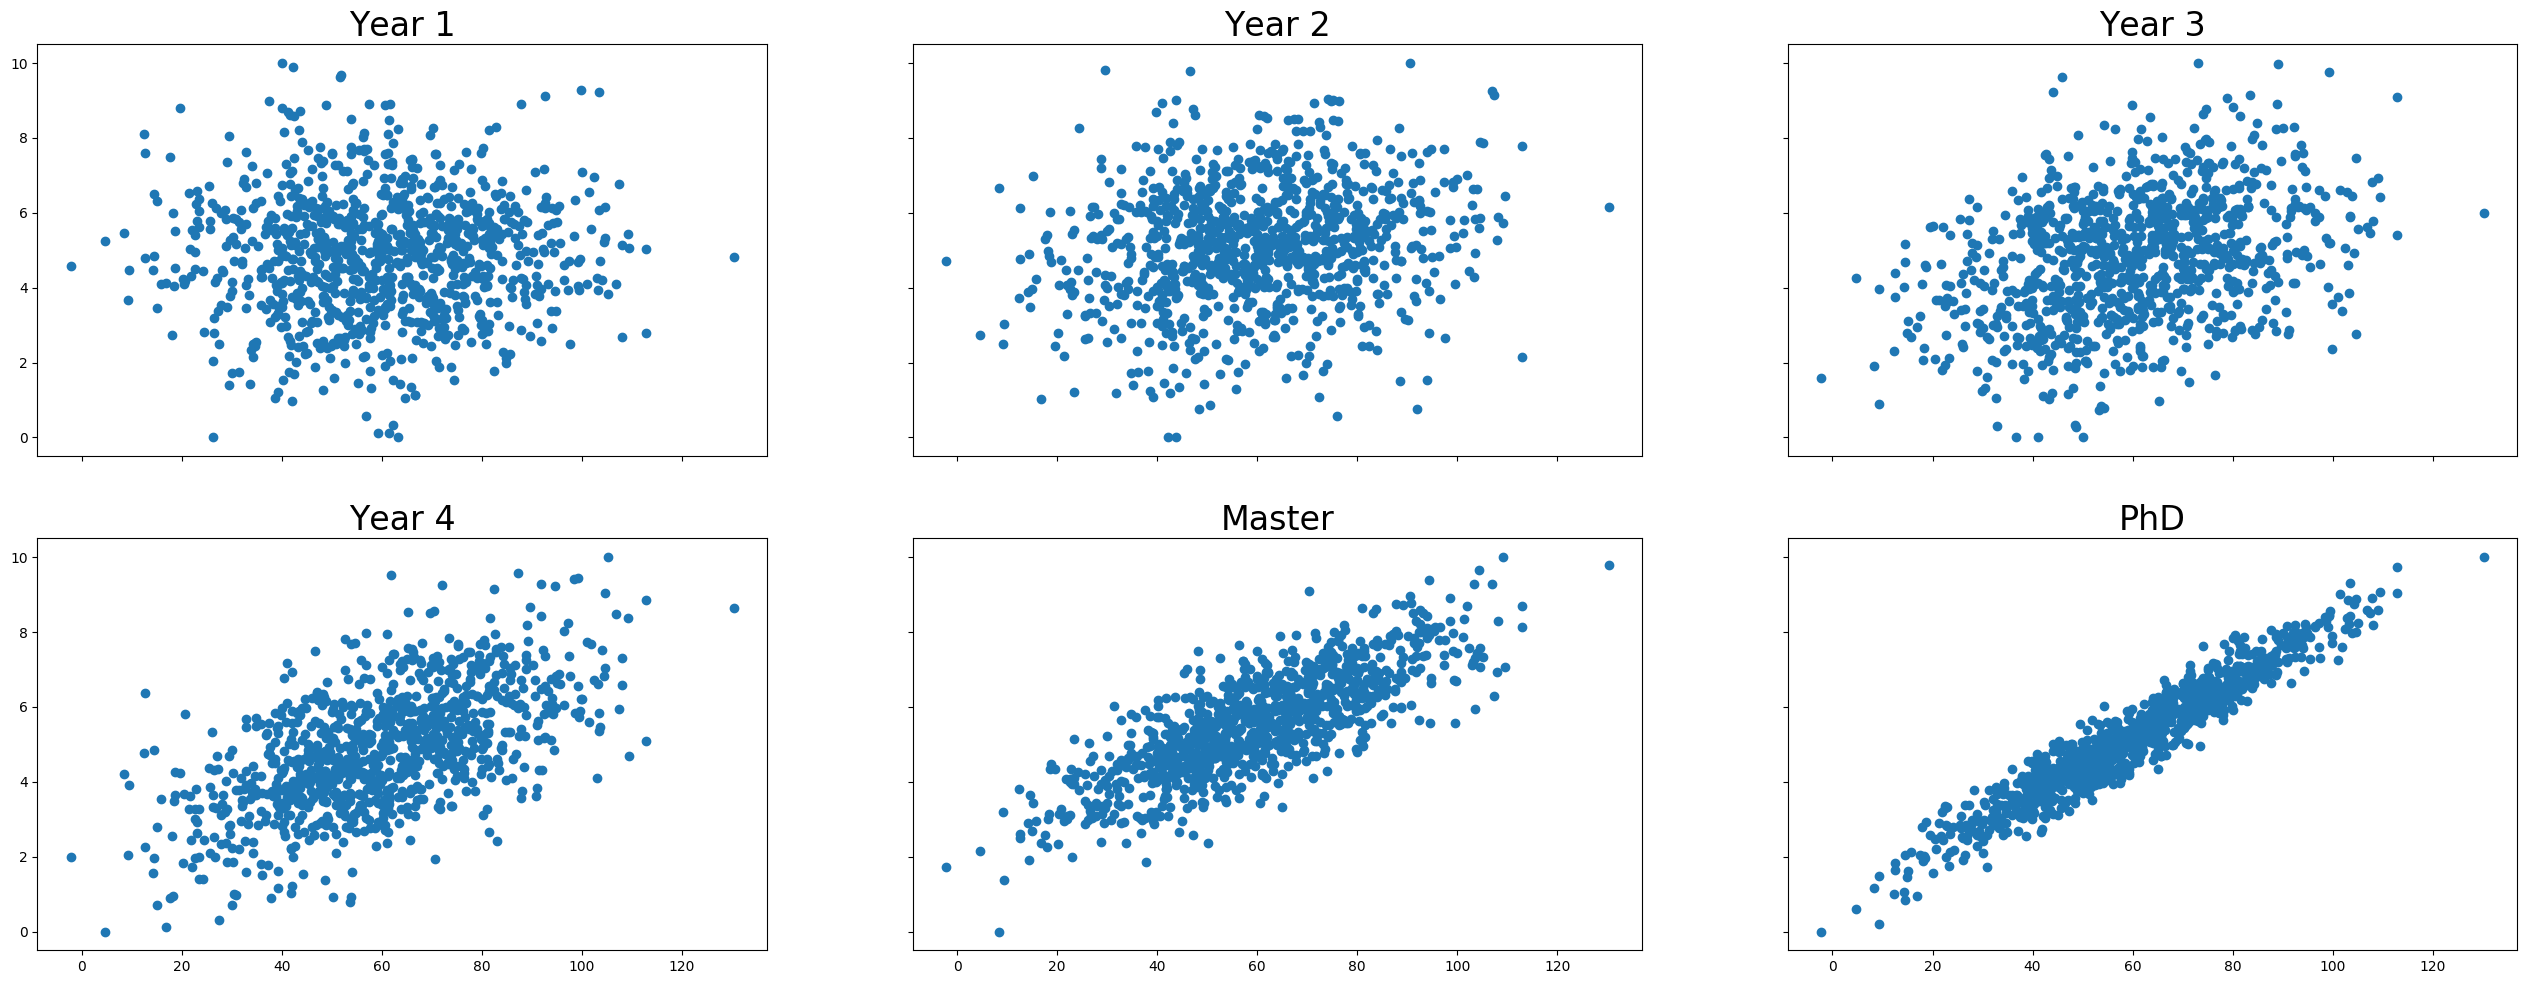

In [5]:
# First, create a new figure with a reasonably large size. 
# This size is indicated in inches, and the dpi argument
# sets the number of pixels per inch.
fig, ax = pyplot.subplots(nrows=2, ncols=3, \
    figsize=(32,12), dpi=100.0, sharex=True, sharey=True)

# First row, first column.
ax[0][0].set_title("Year 1", fontsize=24)
ax[0][0].plot(tay_minutes, happy_Y1, 'o')
# First row, second column.
ax[0][1].set_title("Year 2", fontsize=24)
ax[0][1].plot(tay_minutes, happy_Y2, 'o')
# First row, third column.
ax[0][2].set_title("Year 3", fontsize=24)
ax[0][2].plot(tay_minutes, happy_Y3, 'o')
# Second row, first column.
ax[1][0].set_title("Year 4", fontsize=24)
ax[1][0].plot(tay_minutes, happy_Y4, 'o')
# Second row, second column.
ax[1][1].set_title("Master", fontsize=24)
ax[1][1].plot(tay_minutes, happy_M, 'o')
# Second row, third column.
ax[1][2].set_title("PhD", fontsize=24)
ax[1][2].plot(tay_minutes, happy_PhD, 'o')

In which of the years do you think happiness relates to listening to Taylor Swift? In other words, in what year do you think the amount of minutes that student listens to Taylor Swift every day correlates with their happiness?

You can try to guess the degree of correlation in each plot by just eyeballing them. A more scientific approach would be to quantify the correlation in each plot. The most common correlation quantification is Pearson's correlation coefficient.

You can compute Pearson's coefficient manually (and we will later), but you can also just use an existing function from the Scientific Python package (SciPy). SciPy has a statistics sub-module, which has a `pearsonr` function. Let's load that first:

In [6]:
from scipy.stats import pearsonr

The `pearsonr` function returns two values: R and p. R is Pearson's correlation coefficient, and p is the associated p-value (which you've learned about in earlier practicals). We'll use the R, and ignore the p for now. Let's redraw the plots, but now add a correlation coefficient.

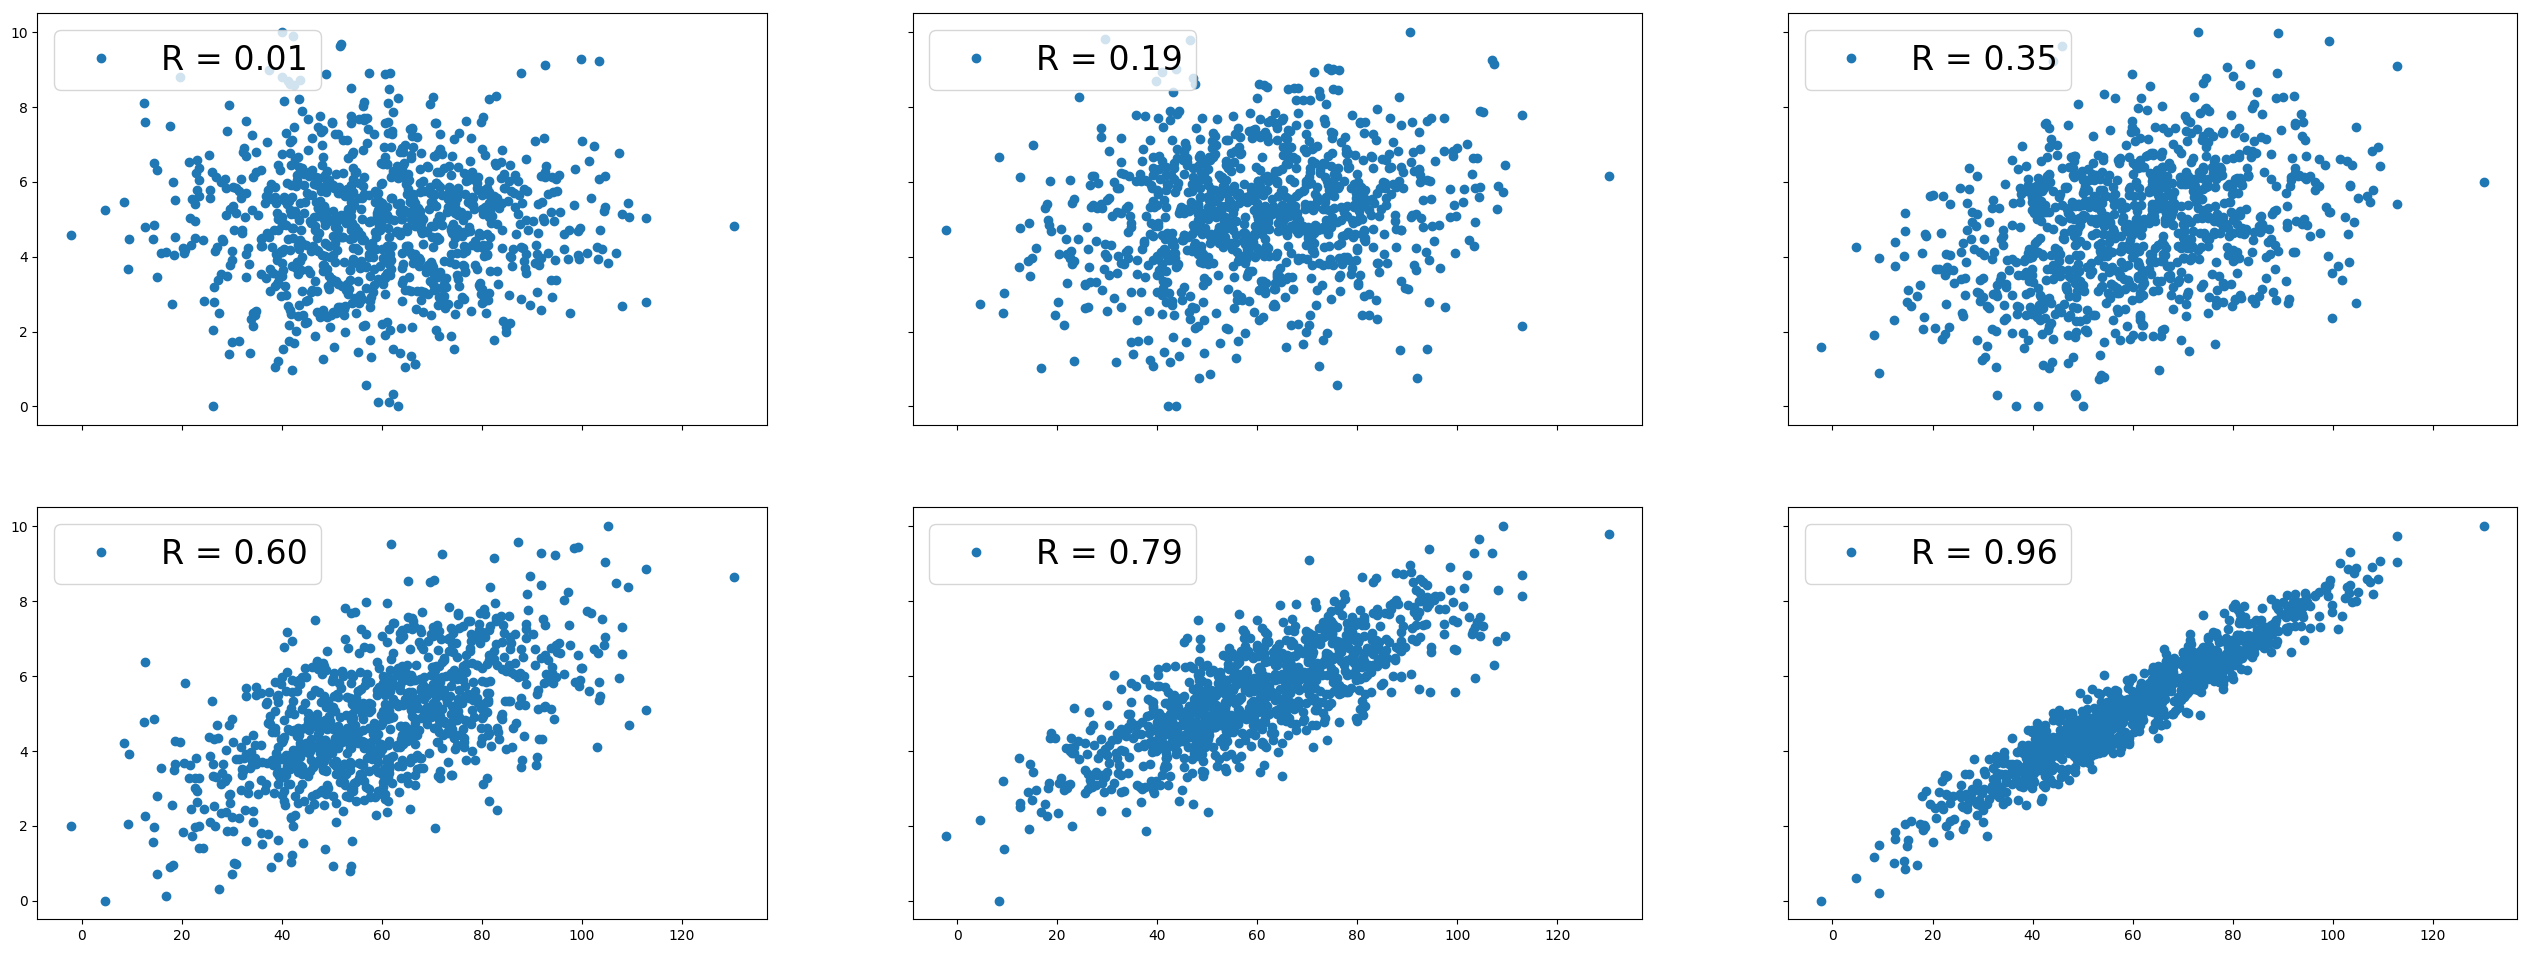

In [7]:
# Create a figure to plot data in. This is the same as 
# before.
fig, ax = pyplot.subplots(nrows=2, ncols=3, \
    figsize=(32,12), dpi=100.0, sharex=True, sharey=True)

# Now use a for-loop to go through all variables.
# NOTE: The following creates two variable that change
# on every iteration of the for loop:
#     i is the iteration number, starting at 0 and
#             going up by 1 on every iteration.
#     happy is the value of each variable in the 
#             list that is passed to the enumerate function.
for i, happy in enumerate([happy_Y1, happy_Y2, \
    happy_Y3, happy_Y4, happy_M, happy_PhD]):
    
    # Determine which row we should draw in. This is the 
    # integer division (ignoring any remainder) of i and
    # the number of columns.
    row = i // 3
    # Determine which column we should draw in. This is
    # the remainder after division of i and the number of
    # columns.
    col = i % 3
    
    # Compute the Pearson correlation for Swift listening
    # and the current group's happiness.
    r, p = pearsonr(tay_minutes, happy)
    
    # Create a label for the current group, including the
    # Pearson R.
    label = "R = %.2f" % (r)
    
    # Draw the data.
    ax[row][col].plot(tay_minutes, happy, 'o', label=label)

    # Draw a legend in the graph.
    ax[row][col].legend(loc="upper left", fontsize=24)

Pearson's correlation coefficient can vary between -1 (complete negative correlation), 0 (no correlation at all), and 1 (complete positive correlation). In the above figure, the top-left plot shows no correlation, whereas the bottom-right plot shows a near-perfect positive correlation.

From this, you could conclude that listening to Taylor Swift has no relation with happiness in Year 1 undergraduates, and almost a 1:1 relation with happiness in PhD students.

One interpretation for this result could be that listening to Taylor Swift determines a great deal of PhD students' happiness, but an equally supported interpretation would be that PhD students who are very happy listen to Taylor Swift more often. Alternatively, there could be a third factor that determines both happiness and Taylor Swift listening. For example, maybe having super peppy friends increases both PhD students' happiness *and* the number of minutes they listen to Taylor Swift every day. In sum, **correlation does not imply causation**, it merely implies the existence of a direct or indirect relation. (And sometimes a correlation is entirely coincidental!)

## **Important**: Variance and Co-variance

Before you go on to learn ALL the things about correlation coefficients, it's good to get (re-)acquainted with two important concepts: *variance* and *covariance*.

Let's say we have a variable $x$, and it consists of the following numbers: $[9, 17, 11, 6, 4]$ There are 5 observations in $x$, and the mean $\bar{x}$ is 9.4

Let's say we have another variable $y$, and it consists of the following numbers: $[18, 10, 20, 14, 6]$ There are 5 observations in $y$, and the mean $\bar{y}$ is 13.6


**Variance** indicates how much individual observations deviate from the mean. To compute it, you follow these steps: 

1. Subtract the mean from every value (results in both positive and negative deviations from the mean).
2. Square those numbers to get rid of their sign (results in values that are higher the further away each observation was from the mean, in either direction)
3. Sum all the values.
4. Take the square root of the sum.

Or, in an equation:

$var(x) = \sqrt{\Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2}}$

Numerical example:

$var(x) = \sqrt{\Sigma^{5}_{i=1} (x_{i} - 9.4)^{2}}$

$var(x) = \sqrt{\Sigma [(9-9.4)^{2}, (17-9.4)^{2}, (11-9.4)^{2}, (6-9.4)^{2}, (4-9.4)^{2}] }$

$var(x) = \sqrt{\Sigma [-0.4^{2},  7.6^{2},  1.6^{2}, -3.4^{2}, -5.4^{2}]}$

$var(x) \approx \sqrt{\Sigma [0.16, 57.76,  2.56, 11.56, 29.16]}$

$var(x) \approx \sqrt{101.2}$

$var(x) \approx 10.06$

The higher the variance is, the more individual observations deviate from the mean of all observations.

**Co-variance** indicates to what extend observations in two variables deviate from the mean *at the same time*. In other words: covariance quantifies whether x rises when y rises as well. To compute it, follow these steps:

1. Subtract the mean of $x$ from every sample in $x$. (High positive or negative values indicate a large difference from the mean.)
2. Subtract the mean of $y$ from every sample in $y$. (High positive or negative values indicate a large difference from the mean.)
3. Multiply the values found in steps a and b. You now have one value for each observation. (High positive values indicate an observation was positively or negatively different from the mean in both $x$ and $y$; whereas high negative values indicate that an observation was positively different from the mean in $x$ but negatively in $y$, or vice versa.)
4. Sum all values obtained in step 3. (A gigh positive sum indicates that many observations were different from the mean in the same direction in both $x$ and $y$, and a high negative sum indicates that many observations were different from the mean in opposite directions between $x$ and $y$. Importantly, a sum that is closer to zero indicates that observations in $x$ and $y$ were not systematically different in the same or the opposite direction between $x$ and $y$.)
5. (Divide the value computed in step 4 by the number of observations. This makes the resulting value more analogous to the standard deviation, which is the variance divided by the number of observations.)

Or, in an equation:

$cov(x,y) = {{1} \over {n}} \Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$

Numerical example:

$cov(x,y) = {{1} \over {5}} \Sigma^{5}_{i=1} (x_{i} - 9.4) (y_{i} - 13.6)$

$cov(x,y) = 0.2 \Sigma [(9-9.4)*(18-13.6), (17-9.4)*(10-13.6), (11-9.4)*(20-13.6), (6-9.4)*(14-13.6), (4-9.4)*(6-13.6)]$

$cov(x,y) = 0.2 \Sigma [-0.4*4.4, 7.6*-3.6, 1.6*6.4, -3.4*0.4, -5.4*-7.6]$

$cov(x,y) \approx 0.2 \Sigma [ -1.76, -27.36,  10.24,  -1.36,  41.04]$

$cov(x,y) \approx 0.2 * 20.8$

$cov(x,y) \approx 4.16$

**Correlation** is the ratio between the covariance of two variables and their respective variances.

## What is this correlation magic, and how can I do it myself?!

At this point, Pearson's correlation coefficient (also known as Pearson's R) will probably look like a bit of a black box. To give you some more insight into how it works, let's examine the coefficient a bit further. In short, Pearson's R is calculated by dividing two populations' covariance by the product of their standard deviations. Or, in a formula:

$\rho_{X,Y} = {{cov(X,Y)} \over {\sigma_{X}\sigma_{Y}}}$

For a sample, the formula looks considerably more scary:

$r_{x,y} = {{\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})} \over {\sqrt{\Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2}} \sqrt{\Sigma^{n}_{i=1} (y_{i} - \bar{y})^{2}}}}$

Although your initial reaction might be to blindly glance over the equations, it might be good to think about what they mean. Let's break them down into smaller parts.

First, $x$ and $y$ represent variables. For example, $x$ could be "minutes listened to Taylor Swift per day", and $y$ could be "self-reported happiness rating".

Probably the most simple bit of the equation is $x_{i} - \bar{x}$. This simply means "subtract the average value of x ( $\bar{x}$ ) from the current value of x ( $x_{i}$ )".

Why does it say "the current value of x"? Well, that's because the big sigma ($\Sigma$) is a *sum operator*. It goes through all values of the variable $x$, does something with them (defined after the sigma), and then adds up all outcomes. You might have noticed the $n$ in $\Sigma^{n}$: that simply means "the number of values in the variable x". (For example, 1000 students' Taylor Swift listening minutes.) Finally, there is the $i=1$ bit in $\Sigma^{n}_{i=1}$. This means "start at the first observation". So, in sum, the sum operator goes through all observations, does something to them, and then adds the outcomes up in one big total value.

Saying the sum operator "does something" to the values is a bit vague. Here, we have a sum operator above the line (the numerator) that reads $\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$ Here, the "does something" means is $(x_{i} - \bar{x}) (y_{i} - \bar{y})$, which means "multiply $x_{i} - \bar{x}$ with $y_{i} - \bar{y}$". We had already established that "$x_{i} - \bar{x}$" means "subtract the average of x from the current value of x".

We can write this in Python code:

In [9]:
# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads 
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Count the number of observations we have.
n = len(x)

# Start with a sum value of 0.
s = 0.0

# Loop through all observations.
for i in range(n):
    # Subtract the current values of x and y from their
    # respective averages, and multiply them. Add the
    # outcome to the sum.
    s += (x[i] - mean_x) * (y[i] - mean_y)

print("Sum = {}".format(round(s, ndigits=2)))

Sum = 11671.9


Fortunately, we can write this a in a shorter way, by using NumPy's `sum` function:

In [10]:
s = numpy.sum( (x - mean_x) * (y-mean_y) )

print("Sum = {}".format(round(s, ndigits=2)))

Sum = 11671.9


This particular sum, $\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$, is called the "covariation of x and y". (Actually, you would divide this sum by the number of observations to obtain the covariance.)

Another part of the Pearson R equation was the bit below the line (the denominator), which includes $\sqrt{\Sigma^{n}_{i=1}(x_{i}-\bar{x})^2}$. Let's work from the inside-out: We already know that $x_{i}-\bar{x}$ means "subtract the average value of x from the current value of x". Here, that value is then squared: $(x_{i}-\bar{x})^2$. All of these squares are then summed together (sum of squares!). Finally, the square root of this sum is calculated.

You might recognise this value as the *variance*.

Let's compute the values in Python:

In [11]:
squares = (x - mean_x)**2
sum_of_squares = numpy.sum(squares)
variance = numpy.sqrt(sum_of_squares)

print("Variance = {}".format(round(variance, ndigits=2)))

Variance = 628.19


You can write this in a single line:

In [12]:
var_x = numpy.sqrt(numpy.sum((x-mean_x)**2))

print("Variance = {}".format(round(var_x, ndigits=2)))

Variance = 628.19


Combining what you learned above, you can compute the Pearson correlation of two values yourself!

In [13]:
# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads 
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Compute the covariance of x and y.
cov = numpy.sum( (x - mean_x) * (y-mean_y) )
# Compute the variance of x.
var_x = numpy.sqrt(numpy.sum((x-mean_x)**2))
# Compute the variance of y.
var_y = numpy.sqrt(numpy.sum((y-mean_y)**2))

# Compute Pearson's R!
r = cov / (var_x * var_y)

print("Pearson's R = {}".format(round(r, ndigits=2)))

Pearson's R = 0.35


Final check to see if this matches what SciPy's Pearson R function produces:

In [14]:
r, p = pearsonr(x,y)

print("Pearson's R = {}".format(round(r, ndigits=2)))

Pearson's R = 0.35


Woop! You can now use and manually compute a Pearson correlation coefficient!

# Non-parametric correlation coefficients

Pearson's correlation is what is referred to as a *parametric test*. This is because it assumes that the values in both variables (x and y) were drawn from a normal distribution. In practice, this won't always hold true.

### Spearman's Rho

If you want to compute a correlation, but your data are *not* normally distributed, the closest alternative might just be Spearman's $\rho$ (Greek letter "rho"). Not unlike [the honey badger](https://www.youtube.com/watch?v=4r7wHMg5Yjg), Spearman doesn't care about how your data is distributed. Instead, it simply rank-orders all the values in both variables.

Spearman's $\rho$ thus depends on the covariance of the ranked variables x and y, not on their actual values. The equation is:

$\rho = {{cov(rg_{x}, rg_{y})} \over {\sigma_{rg_{x}} \sigma_{rg_{y}}}}$

Here, $rg_{x}$ is simply the rank-score of each value in the variable x. For example, if $x = [2, 5, 3]$ then $rg_{x} = [1, 3, 2]$. $\sigma_{rg_{x}}$ is the standard deviation of the rank-scored values.

**Important note**: the covariance in this equation is treated subtly differently from the covariance in the equation for Pearson's correlation coefficient. Specifically, the value is computed in exactly the same way, but for Spearman's $\rho$ it is divided by the number of observations.

Let's see Spearman's $\rho$ in practice:

In [15]:
# Import a function that can rank-score our data.
from scipy.stats import rankdata

# Let's take Taylor Swift listening as 'x' values.
x = rankdata(tay_minutes)
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = rankdata(happy_Y3)
mean_y = numpy.mean(y)

# Count the number of observations, and save it as a 
# floating point number.
n = float(len(x))

# Compute the covariance of the ranked x and y.
cov = numpy.sum( (x - mean_x) * (y-mean_y) ) / n
# Compute the standard deviations of the ranked x and y.
sd_x = numpy.std(x)
sd_y = numpy.std(y)

# Compute rho
rho = cov / (sd_x * sd_y)

print("Spearman's rho = {}".format(round(rho, ndigits=2)))

Spearman's rho = 0.34


Fortunately, we can simply refer to a pre-existing function in SciPy's `stats` sub-module:

In [16]:
# Import the spearmanr function from SciPy
from scipy.stats import spearmanr

# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Compute the Spearman rank correlation coefficient.
rho, p = spearmanr(x, y)

print("Spearman's rho = {}".format(round(rho, ndigits=2)))

Spearman's rho = 0.34


### Kendall's tau

Conceptually, Spearman's $\rho$ maps onto Pearson's $r$ very nicely. However, it is not the only option you have to compute a non-parametric correlation coefficient. There is also Kendall's $\tau$. After counting all concordant and disconcordant pairs, Kendall's $\tau$ can be computed like this:

$\tau = {{N_{concordant} - N_{disconcordant}} \over {n (n-1)/2}}$

Again, fortunately for us, SciPy has a function for this:

In [20]:
from scipy.stats import kendalltau

# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = happy_Y3

# Compute Kendall's tau
tau, p = kendalltau(x, y)

print("Kendall's tau = {}".format(round(tau, ndigits=2)))

Kendall's tau = 0.23


Although the value for Kendall's $\tau$ is lower than Spearman's $\rho$ and Pearson's $r$, that does not mean it doesn't count as much. In fact, lower values of Kendall's $\tau$ correspond to higher values of Spearman's $\rho$ or Pearson's $r$. (For example, a Pearson R of 0.8 is equivalent to a Kendall $\tau$ of 0.6)

If you want to know more about why Kendall's $\tau$ is more powerful than the other two correlation coefficients, please read the following article:

- Bonett, D. G., & Wright, T. A. (2000). Sample size requirements for estimating Pearson, Kendall, and Spearman correlations. *Psychometrika*, *65*(1), 23–28.